In [8]:
import os, sys, time
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples, silhouette_score


import common
import DimensionalityReduction.DimensionalityReductionDatasets as dr_datasets
from data.faces.faces_data import get_faces_dataset, get_faces_dataset_with_all_labels

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET = "Faces"

In [2]:
filenames_train, filenames_test, X_train_faces, X_test_faces, y_train_faces, y_test_faces =\
get_faces_dataset_with_all_labels()

reload(dr_datasets)
ica_faces, _ = dr_datasets.get_faces_ica()

Running ICA for 216 components


In [3]:
reload(common)
n = ica_faces.shape[1]
distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times =\
common.compute_kmeans_scores(ica_faces, n)

For n_clusters = 2 average silhouette_score: 0.17977999312787474 time taken: 0.21407651901245117s
For n_clusters = 3 average silhouette_score: 0.053929501839072906 time taken: 0.2605116367340088s
For n_clusters = 4 average silhouette_score: 0.06371339942672033 time taken: 0.28705596923828125s
For n_clusters = 5 average silhouette_score: 0.03954455838858688 time taken: 0.485598087310791s
For n_clusters = 6 average silhouette_score: 0.010617307885271274 time taken: 0.36057353019714355s
For n_clusters = 7 average silhouette_score: 0.031040563354507885 time taken: 0.23973393440246582s
For n_clusters = 8 average silhouette_score: 0.029027873220142015 time taken: 0.45360398292541504s
For n_clusters = 9 average silhouette_score: 0.02675171981109155 time taken: 0.9683167934417725s
For n_clusters = 10 average silhouette_score: 0.00943770362670305 time taken: 0.3572409152984619s
For n_clusters = 11 average silhouette_score: 0.006856194975012235 time taken: 0.49688720703125s
For n_clusters = 12 a

For n_clusters = 85 average silhouette_score: -0.04500271197821132 time taken: 14.616090774536133s
For n_clusters = 86 average silhouette_score: -0.06444960532228122 time taken: 15.934790134429932s
For n_clusters = 87 average silhouette_score: -0.05356033084870872 time taken: 15.326761722564697s
For n_clusters = 88 average silhouette_score: -0.05915990682031526 time taken: 15.041874408721924s
For n_clusters = 89 average silhouette_score: -0.05888446936777204 time taken: 14.212921142578125s
For n_clusters = 90 average silhouette_score: -0.05399811073854518 time taken: 14.983628034591675s
For n_clusters = 91 average silhouette_score: -0.06136711902415729 time taken: 15.088679075241089s
For n_clusters = 92 average silhouette_score: -0.05826179753900864 time taken: 15.06566596031189s


/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


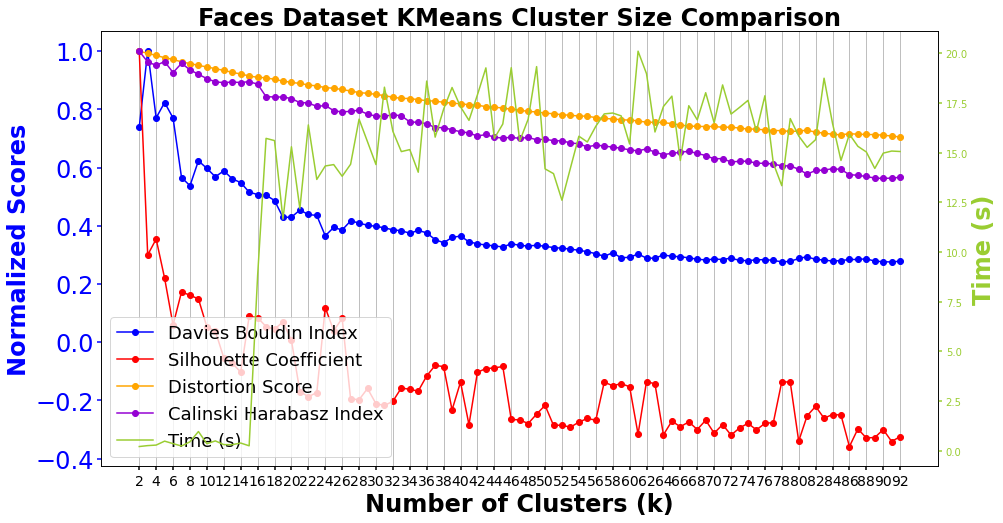

In [42]:
common.plot_kmeans_all(distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


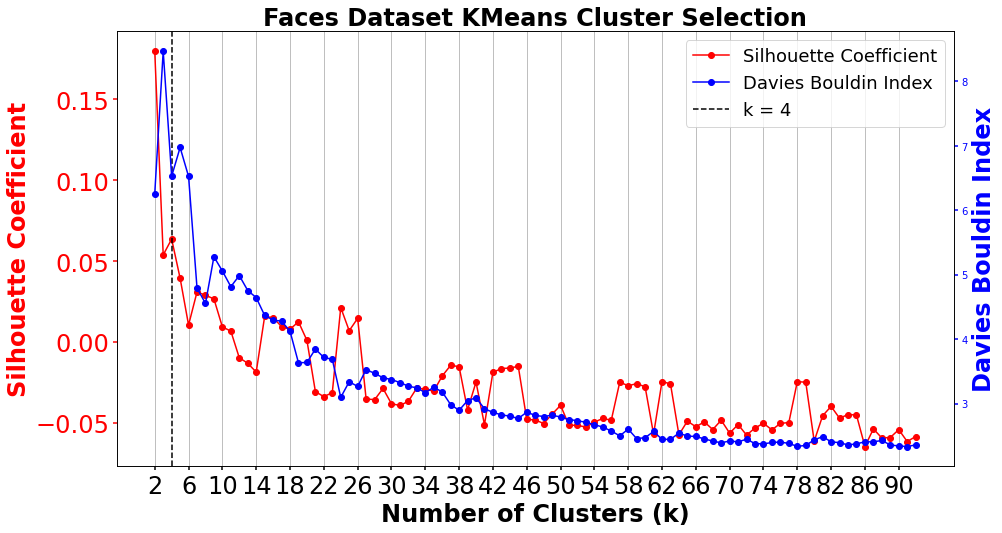

In [43]:
reload(common)
best_k = 4
common.plot_kmeans_selection(davies_bouldin_scores, silhouette_scores, best_k=best_k, DATASET=DATASET)

For n_clusters = 4 average silhouette_score: 0.06371339942672033 time taken: 0.17573070526123047s


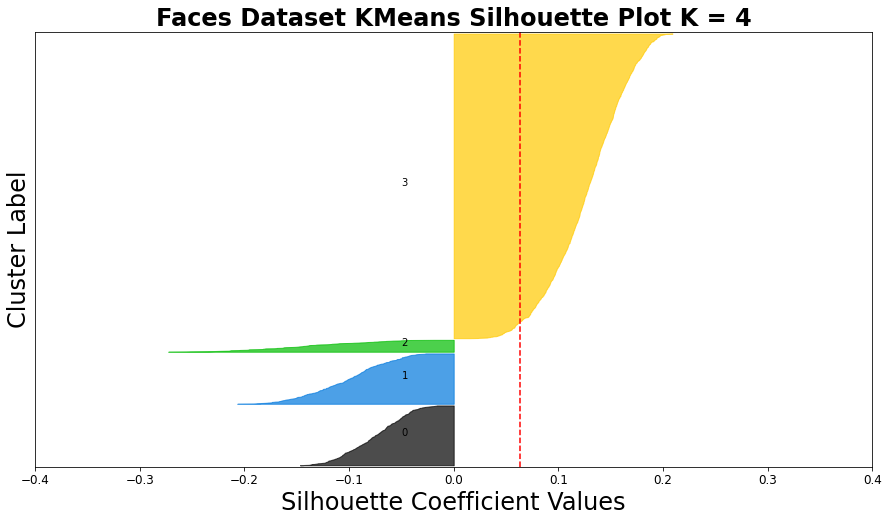

In [44]:
reload(common)
common.plot_silhouette_kmeans(ica_faces, best_k, DATASET, xlim=[-0.4, 0.4])

In [45]:
start_time = time.time()
km = KMeans(n_clusters=best_k, **common.km_arguements)
km.fit(ica_faces)
end_time = time.time()
print("Time Taken {} s".format(end_time - start_time))
y_train_faces['km_labels']=km.labels_
ica_faces_km = pd.DataFrame(ica_faces.copy())
ica_faces_km['km_labels'] = km.labels_
ica_faces_km_vis = ica_faces_km.copy()
ica_faces_km_vis['sex'] = y_train_faces['sex']
ica_faces_km_vis['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(km.labels_, y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(km.labels_, y_train_faces['race']))
print("Silhouette Score: {}".format(silhouette_score(ica_faces, km.labels_)))

Time Taken 0.1896052360534668 s
homogeneity_score sex:  0.00021174530559165035
homogeneity_score race:  0.0025479514985500325
Silhouette Score: 0.06371339942672033


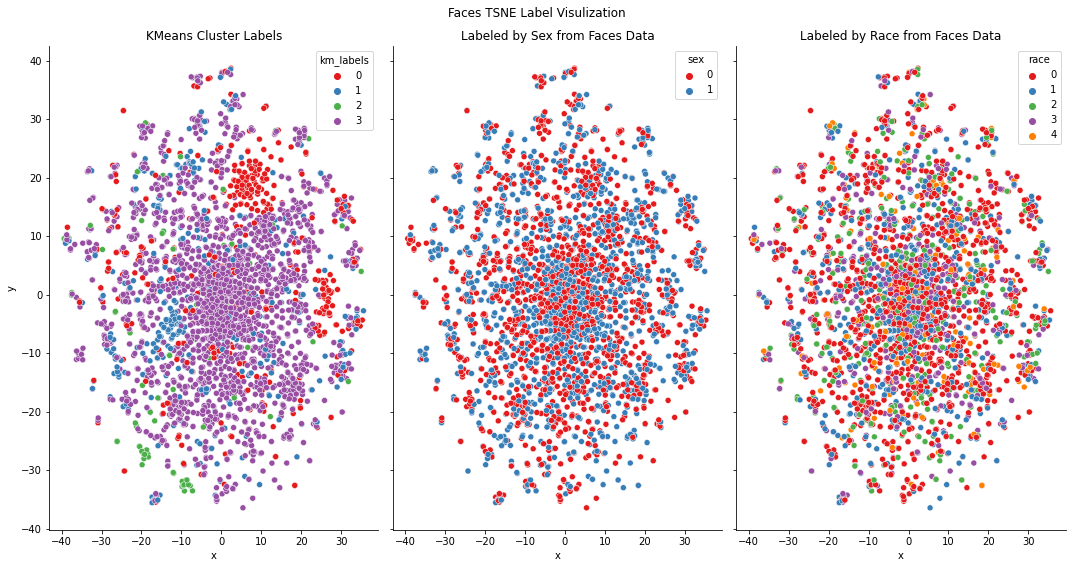

In [10]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(ica_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="km_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("KMeans Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

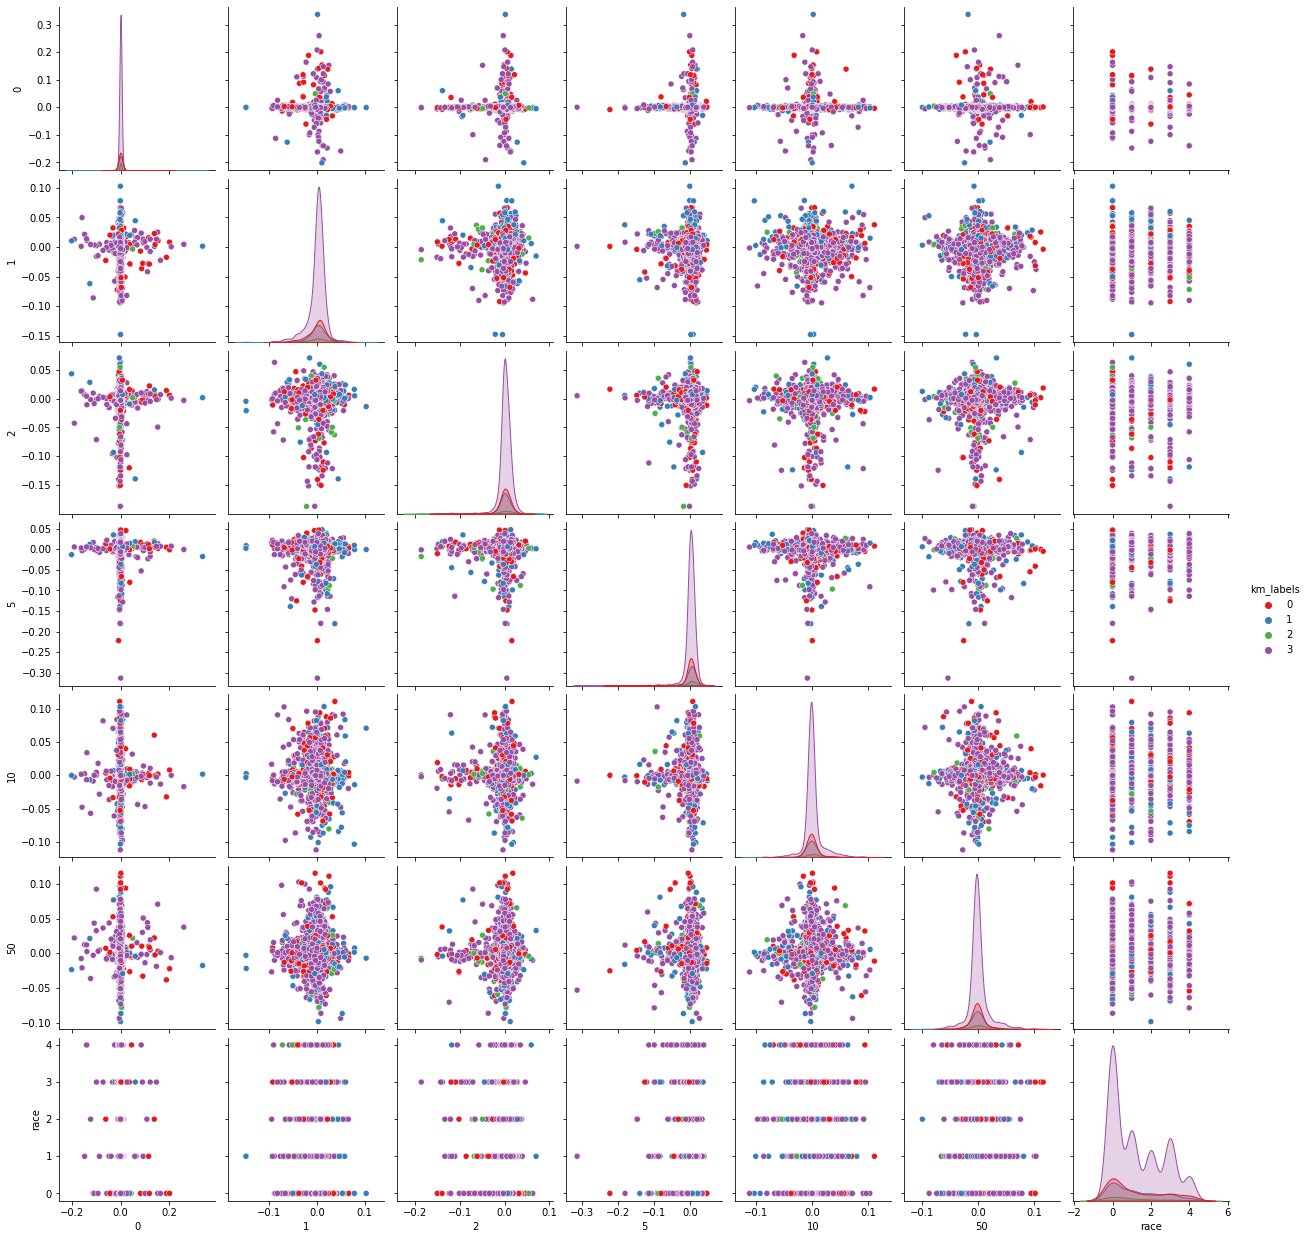

In [37]:
sns.pairplot(ica_faces_km_vis[[0, 1, 2, 5, 10, 50,'race', "km_labels"]], hue="km_labels", palette="Set1")

# Expectation Maximization

In [12]:
reload(common)
em_n = ica_faces.shape[1]
n_components = np.arange(2, em_n)
davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em =\
common.compute_em_scores(ica_faces, em_n)

For n_clusters = 2 average silhouette_score: 0.1374256252623987 time taken: 0.6422126293182373s
For n_clusters = 3 average silhouette_score: 0.08878064146446828 time taken: 1.3887622356414795s
For n_clusters = 4 average silhouette_score: 0.06590533185531602 time taken: 1.066101312637329s
For n_clusters = 5 average silhouette_score: 0.015538300022320633 time taken: 1.833716869354248s
For n_clusters = 6 average silhouette_score: 0.05912832722337492 time taken: 1.900904655456543s
For n_clusters = 7 average silhouette_score: 0.07423094752787089 time taken: 2.327207565307617s
For n_clusters = 8 average silhouette_score: 0.0006679048409372109 time taken: 2.7103121280670166s
For n_clusters = 9 average silhouette_score: 0.053500197776927834 time taken: 3.7374556064605713s
For n_clusters = 10 average silhouette_score: -0.03311948922553816 time taken: 4.538052082061768s
For n_clusters = 11 average silhouette_score: 0.05915616411722008 time taken: 3.6786422729492188s
For n_clusters = 12 average s

For n_clusters = 86 average silhouette_score: -0.047005652057298064 time taken: 4.43533992767334s
For n_clusters = 87 average silhouette_score: -0.04697232621068139 time taken: 4.9107441902160645s
For n_clusters = 88 average silhouette_score: -0.0467919055933233 time taken: 4.7149457931518555s
For n_clusters = 89 average silhouette_score: -0.03640840406044696 time taken: 8.510577917098999s
For n_clusters = 90 average silhouette_score: -0.04830439277427672 time taken: 5.725770711898804s
For n_clusters = 91 average silhouette_score: -0.03238104778062687 time taken: 6.388043642044067s
For n_clusters = 92 average silhouette_score: -0.03540483756771812 time taken: 5.291019678115845s


/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:250: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


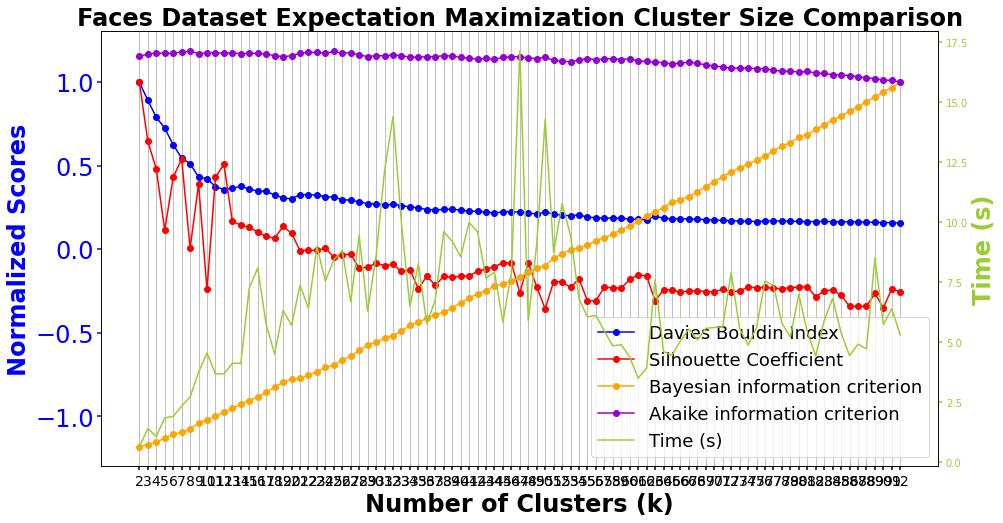

In [46]:
reload(common)
common.plot_em_all(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


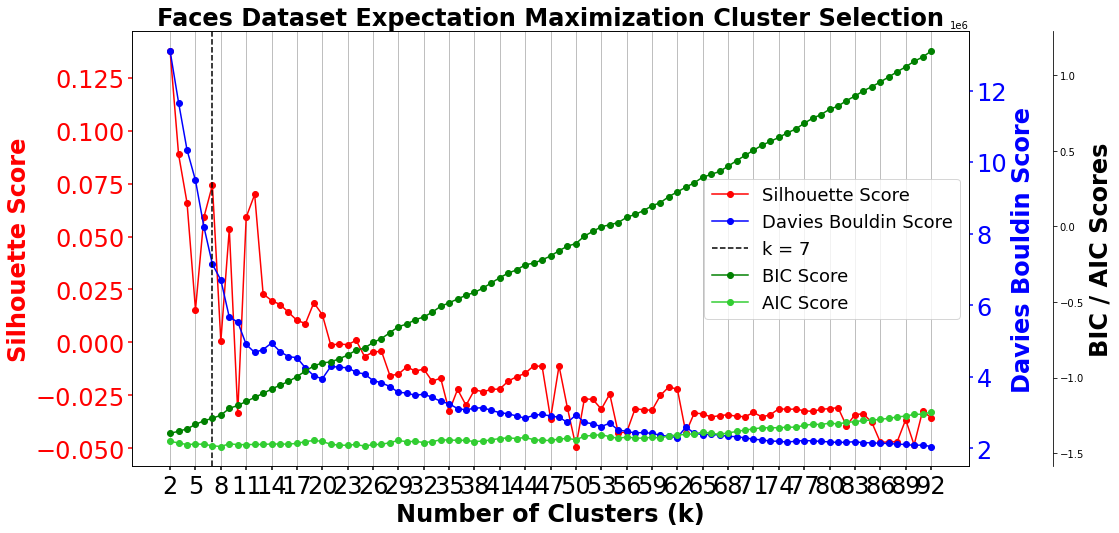

In [47]:
reload(common)
best_k = 7
common.plot_em_selection(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, best_k, DATASET, tick_spacing=3)

For n_clusters = 7 average silhouette_score: 0.07423094752787089 time taken: 2.679894208908081s


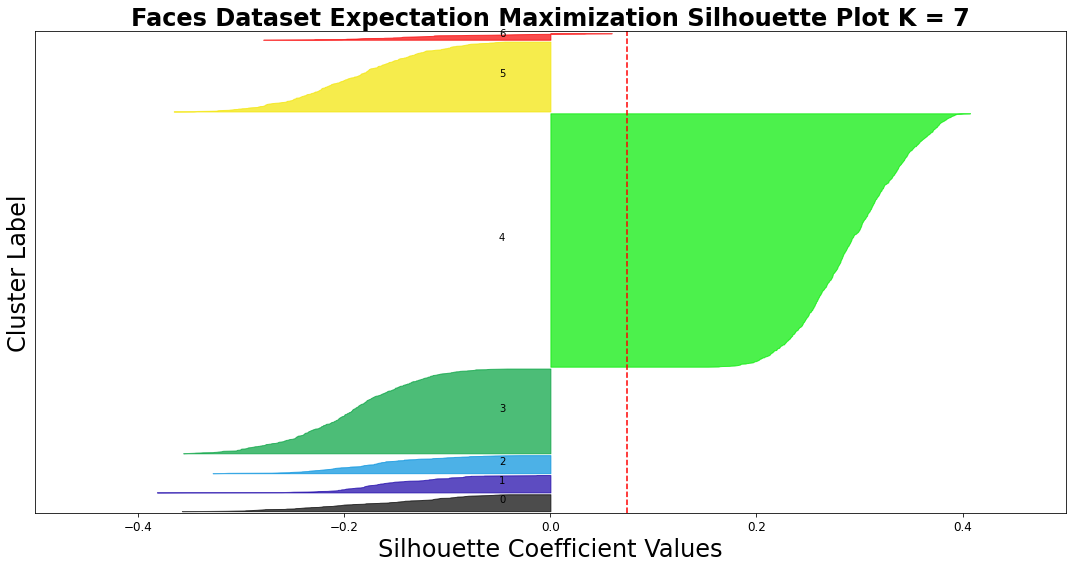

In [52]:
reload(common)
best_k=7
common.plot_silhouette_em(ica_faces, best_k, DATASET, xlim=[-0.5, 0.5])

In [53]:
start_time = time.time()
em_model = GaussianMixture(best_k, covariance_type='full', random_state=42)
em_model.fit(ica_faces)
end_time = time.time()
print("time taken {} s".format(end_time-start_time))
y_train_faces['em_labels']=em_model.predict(ica_faces)
ica_faces_gm = pd.DataFrame(ica_faces.copy())
ica_faces_gm['em_labels'] = em_model.predict(ica_faces)

ica_faces_gm_vis = ica_faces_gm.copy()
ica_faces_gm_vis['sex'] = y_train_faces['sex']
ica_faces_gm_vis['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(em_model.predict(ica_faces), y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(em_model.predict(ica_faces), y_train_faces['race']))
print("Silhouette Score: {}".format(silhouette_score(ica_faces, em_model.predict(ica_faces))))

time taken 5.658266067504883 s
homogeneity_score sex:  0.0009995619892932534
homogeneity_score race:  0.0020527590045883413
Silhouette Score: 0.021187607971095965


In [50]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(ica_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

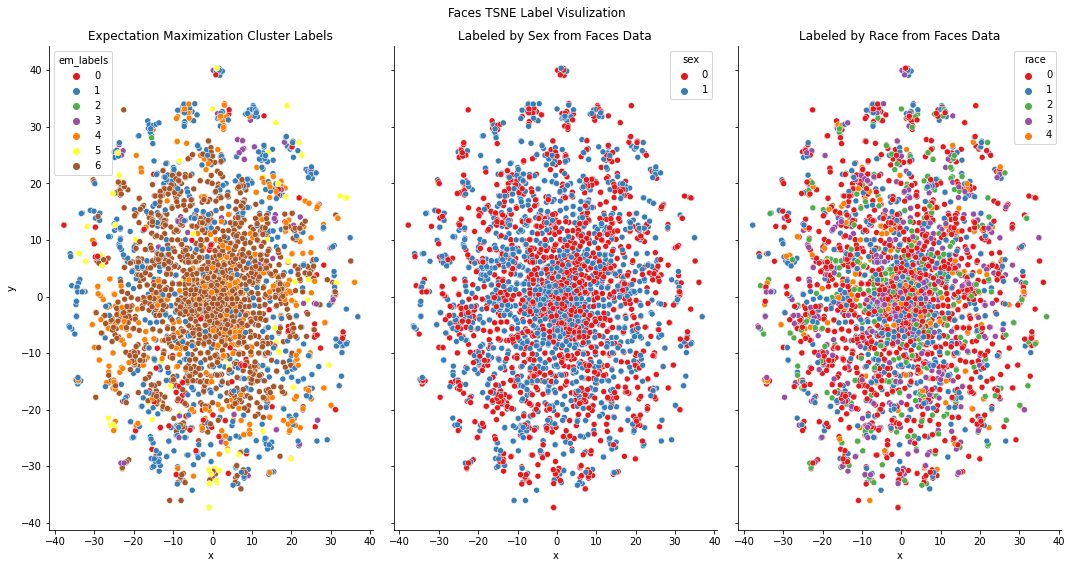

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("Expectation Maximization Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/rich

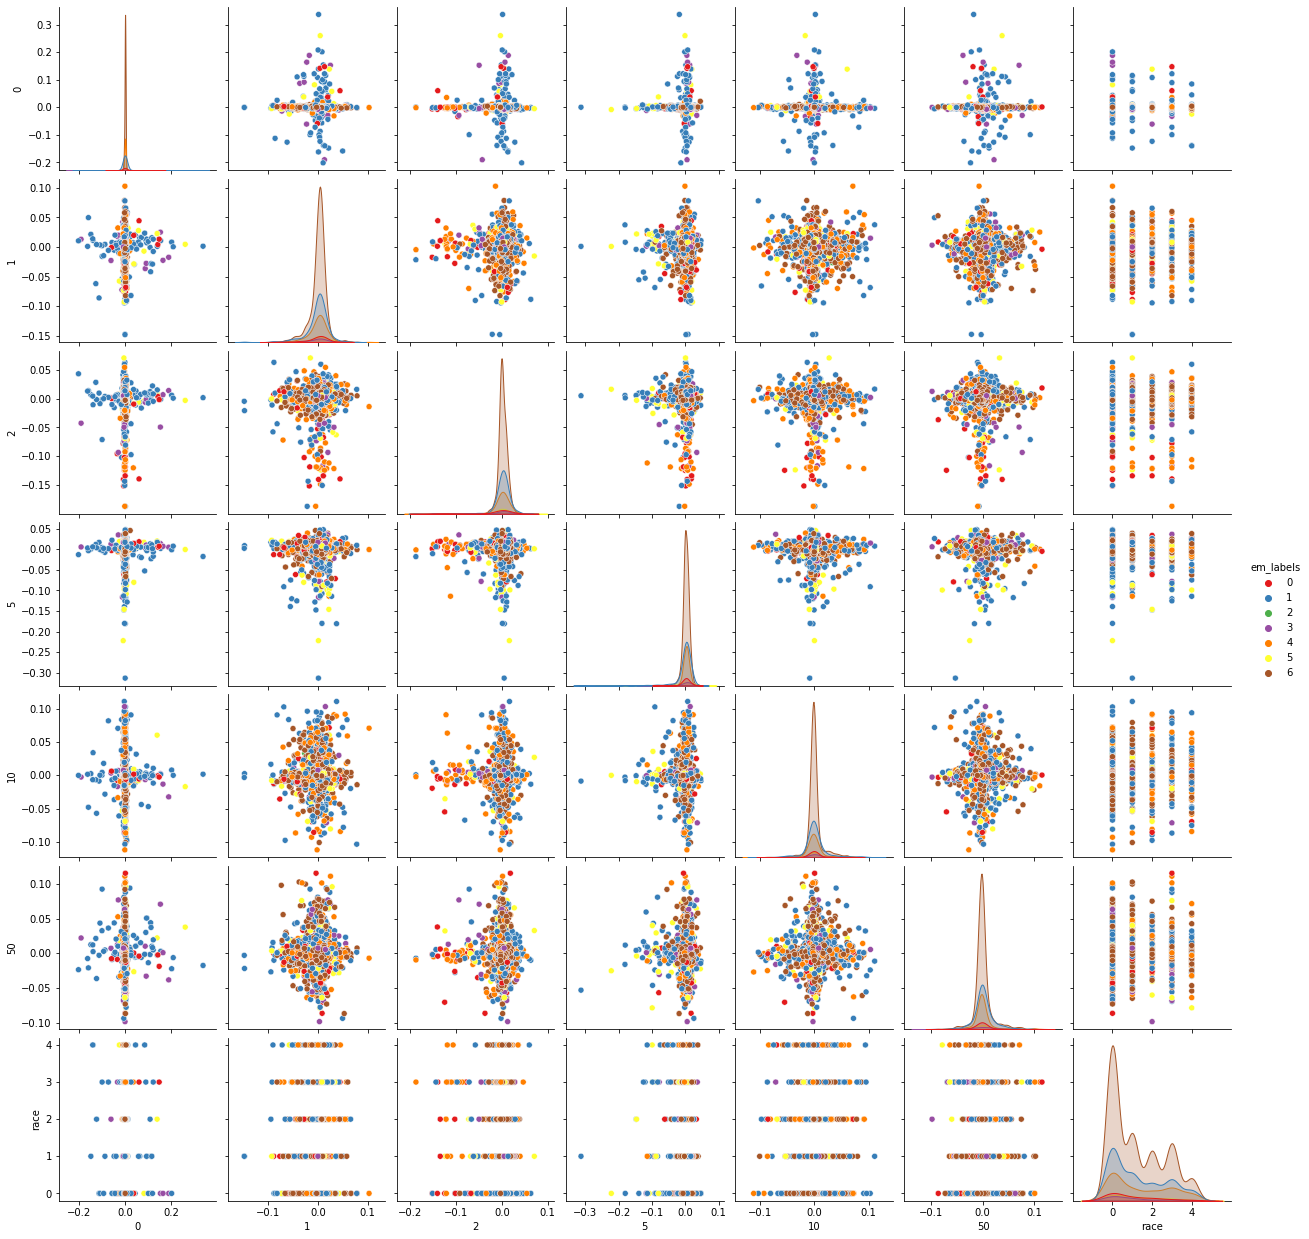

In [33]:
sns.pairplot(ica_faces_gm_vis[[0, 1, 2, 5, 10, 50, "race", "em_labels"]], hue="em_labels", palette="Set1")